In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 6)
sns.set(font_scale=1.5, style="white")

In [2]:
covid_df = pd.read_csv('raw_data.csv', parse_dates = ['date'])

In [3]:
covid_df.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [4]:
# Drop unnamed columns
covid_df = covid_df.iloc[:, 0:9]
covid_df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535


In [5]:
covid_df.columns = ['code', 'country','date','total_cases',
                    'total_deaths','stringency_index','population','GDP_capita', 'HDI']

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   code              50418 non-null  object        
 1   country           50418 non-null  object        
 2   date              50418 non-null  datetime64[ns]
 3   total_cases       47324 non-null  float64       
 4   total_deaths      39228 non-null  float64       
 5   stringency_index  43292 non-null  float64       
 6   population        50418 non-null  int64         
 7   GDP_capita        44706 non-null  float64       
 8   HDI               44216 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 3.5+ MB


In [7]:
covid_df.describe()

,total_cases,total_deaths,stringency_index,population,GDP_capita,HDI
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [8]:
covid_df.isna().sum()

code                    0
country                 0
date                    0
total_cases          3094
total_deaths        11190
stringency_index     7126
population              0
GDP_capita           5712
HDI                  6202
dtype: int64

In [9]:
# Imputer to be added?
# from sklearn.impute import SimpleImputer
# X = covid_df.values
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:9])
# X[:, 3:9] = imputer.transform(X[:,3:9])

In [10]:
# test_df = pd.DataFrame(X)
# test_df.columns = covid_df.columns

In [11]:
# test_df.isna().sum()

In [12]:
# mortality rate
covid_df['mortality_rate'] = covid_df['total_deaths']/covid_df['total_cases']

# normalize total cases and total deaths by population
covid_df['prop_cases'] = covid_df['total_cases']/covid_df['population']
covid_df['prop_death'] = covid_df['total_deaths']/covid_df['population']

In [13]:
covid_df.head()

,code,country,date,total_cases,total_deaths,stringency_index,population,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,0.0,0.0
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,0.0,0.0
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,0.0,0.0
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,0.0,0.0
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,NaN,0.0,0.0


In [14]:
by_country = covid_df.groupby(['country']).mean()
by_country = by_country.reset_index()
by_country

,country,total_cases,total_deaths,stringency_index,population,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,Afghanistan,17436.846939,564.200680,49.140036,38928341,1803.987,0.498,0.027666,0.000448,1.449331e-05
1,Albania,4764.226667,139.891892,67.753460,2877800,11803.431,0.785,0.032511,0.001656,4.861071e-05
2,Algeria,21094.823276,934.067873,56.593182,43851043,13913.839,0.754,0.064642,0.000481,2.130093e-05
3,Andorra,1016.254545,47.584541,42.987897,77265,NaN,0.858,0.049546,0.013153,6.158615e-04
4,Angola,1433.985849,57.941176,77.841144,32866268,5819.495,0.581,0.057978,0.000044,1.762938e-06
...,...,...,...,...,...,...,...,...,...,...
205,Venezuela,22201.073394,198.252427,83.584651,28435943,16745.022,0.761,0.014348,0.000781,6.971896e-06
206,Vietnam,460.969925,28.975000,56.615392,97338583,6171.884,0.694,0.027888,0.000005,2.976723e-07
207,Yemen,1186.139896,373.860465,43.944839,29825968,1479.147,0.452,0.261335,0.000040,1.253473e-05
208,Zambia,5255.409302,132.375000,48.690299,18383956,3689.251,0.588,0.022757,0.000286,7.200572e-06


In [15]:
# Top 4 countries highlighted
cases_sort = covid_df.sort_values(by = 'total_cases', ascending = False)
cases_sort['country'].unique()
top_4 = {'United States': 'red', 'India': 'orange', 'Brazil': 'blue', 'Russia': 'pink'}
others = {colour:'grey' for colour in cases_sort['country'].unique()[4:]}
palette = {**top_4, **others}

Text(0.5, 1.0, 'Total cases per country')

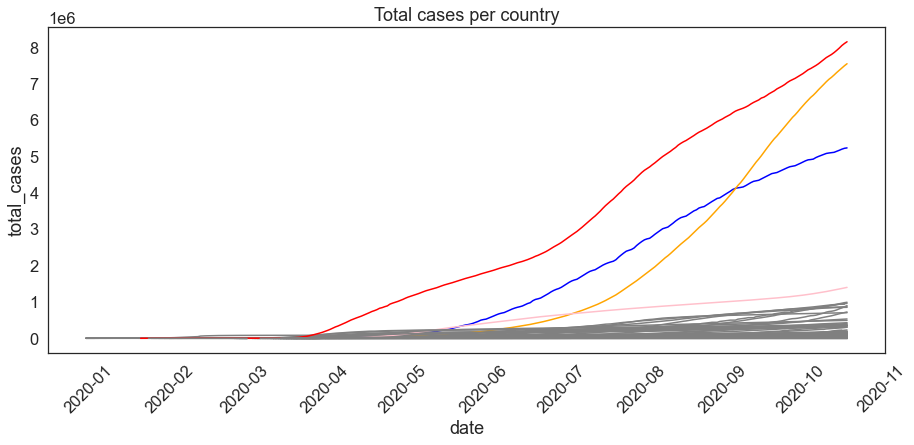

In [16]:
plt.xticks(rotation = 45)
ax = sns.lineplot(x = 'date', y = 'total_cases', hue = 'country', legend = False, data = covid_df, palette = palette)
ax.set_title("Total cases per country")

The top four countries with highest total cases are USA, India, Brazil, Russia. 

In [1]:
# Not very readable
plt.figure(figsize = [15,6])

ax = sns.lineplot(x = 'date', y = 'prop_cases', hue = 'country', legend = False, data = covid_df)
ax.set_title("Total cases normalized by population")
plt.xticks(rotation = 45,)


NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Proportion of death vs HDI')

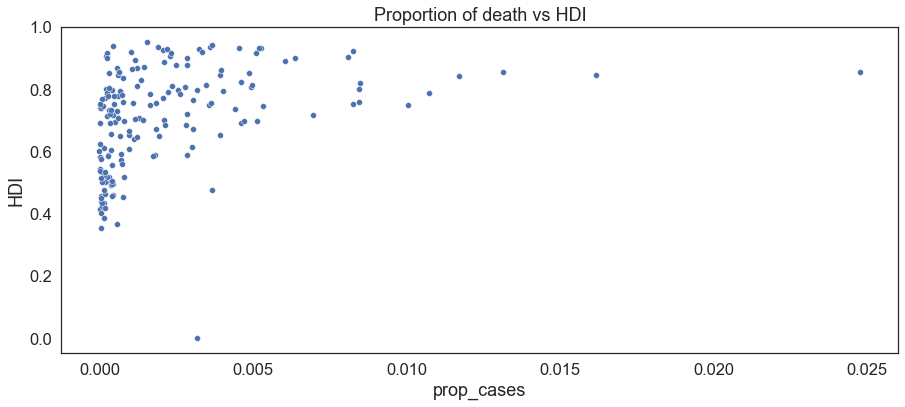

In [18]:
ax = sns.scatterplot(x = 'prop_cases', y = 'HDI', data = by_country)
ax.set_title('Proportion of death vs HDI')

Text(0.5, 1.0, 'Mortality rate vs Stringency index')

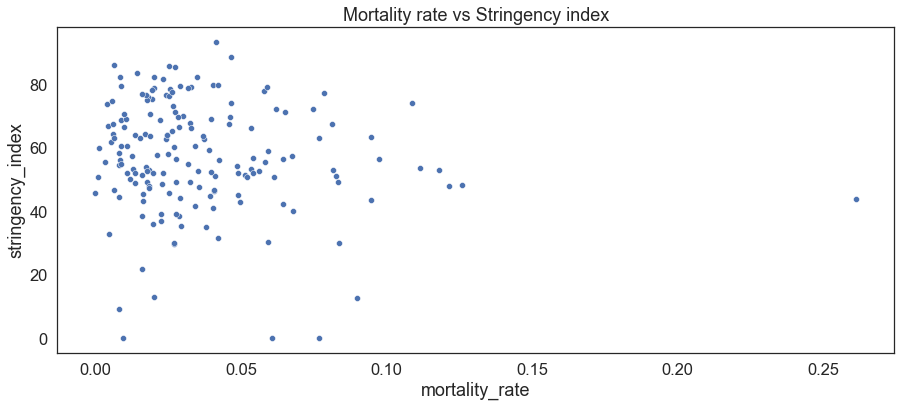

In [19]:
ax = sns.scatterplot(x = 'mortality_rate', y = 'stringency_index', data = by_country)
ax.set_title('Mortality rate vs Stringency index')

In [20]:
max_cases = covid_df[covid_df.total_cases == covid_df['total_cases'].max()]
max_deaths = covid_df[covid_df.total_deaths == covid_df['total_deaths'].max()]
print(max_cases['country'])
print(max_deaths['country'])

48414    United States
Name: country, dtype: object
48414    United States
Name: country, dtype: object


USA has the maximum number of cases and maximum number of deaths.

In [21]:
max_prop_cases = by_country[by_country.prop_cases == by_country['prop_cases'].max()]
max_prop_death = by_country[by_country.prop_death == by_country['prop_death'].max()]
print(max_prop_cases['country'])
print(max_prop_death['country'])

155    Qatar
Name: country, dtype: object
162    San Marino
Name: country, dtype: object


Qatar has the highest average proportion of cases by population. San Marino has the highest average proportion of deaths.

<AxesSubplot:xlabel='prop_cases', ylabel='country'>

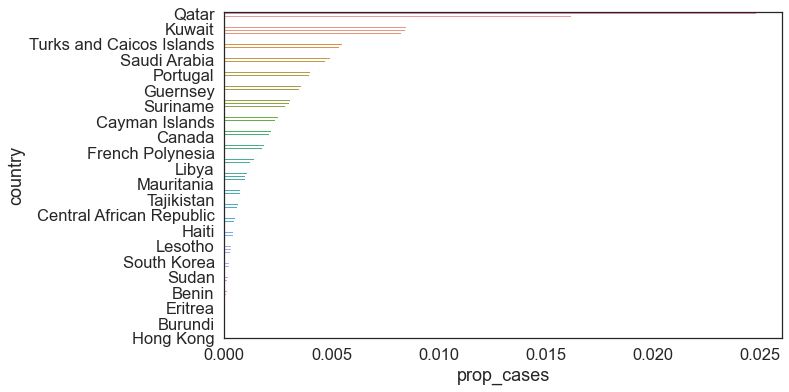

In [22]:
sort_propcases = by_country.sort_values(by = 'prop_cases', ascending = False)
figure = plt.figure(figsize=(10,6))
y_label = list(range(0,210,10))
y_label.append(209)
ax = sns.barplot(x = 'prop_cases', y = 'country', data = sort_propcases)
plt.yticks(y_label)
ax

In [23]:
by_time = covid_df.groupby('date').mean()
by_time = by_time.reset_index()
by_time

,date,total_cases,total_deaths,stringency_index,population,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,2019-12-31,2.700000,0.000000,0.000000,8.860335e+07,32111.575750,0.815079,NaN,1.875881e-09,0.000000
1,2020-01-01,2.700000,0.000000,0.044127,8.860335e+07,32111.575750,0.815079,NaN,1.875881e-09,0.000000
2,2020-01-02,2.700000,0.000000,0.352698,8.860335e+07,32111.575750,0.815079,NaN,1.875881e-09,0.000000
3,2020-01-03,4.400000,0.000000,0.440952,8.860335e+07,32111.575750,0.815079,NaN,3.056991e-09,0.000000
4,2020-01-04,4.400000,0.000000,0.440952,8.860335e+07,32111.575750,0.815079,NaN,3.056991e-09,0.000000
...,...,...,...,...,...,...,...,...,...,...
289,2020-10-15,185786.951923,5754.547368,52.900115,3.725907e+07,19284.983786,0.706050,0.025511,6.567634e-03,0.000150
290,2020-10-16,186796.282297,5786.673684,52.125634,3.708408e+07,19191.655585,0.705166,0.025387,6.658737e-03,0.000151
291,2020-10-17,189042.711538,5817.338624,52.485692,3.721381e+07,19039.141148,0.703900,0.025107,6.739507e-03,0.000150
292,2020-10-18,190627.966184,5822.255319,53.939298,3.733760e+07,18908.647033,0.702715,0.024897,6.748437e-03,0.000147


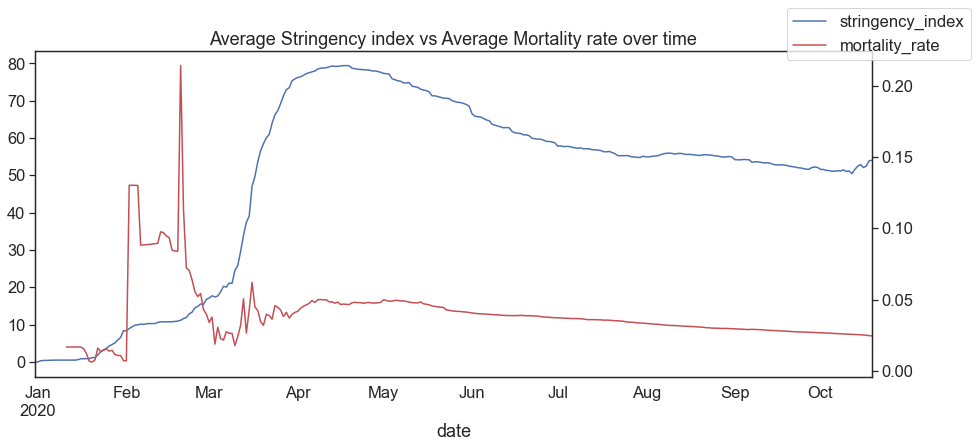

In [24]:
ax = by_time.plot(x="date", y="stringency_index", legend=False)
ax2 = ax.twinx()
by_time.plot(x="date", y="mortality_rate", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_title("Average Stringency index vs Average Mortality rate over time")
plt.show()

Lower average mortality rate as average stringency index increases over time

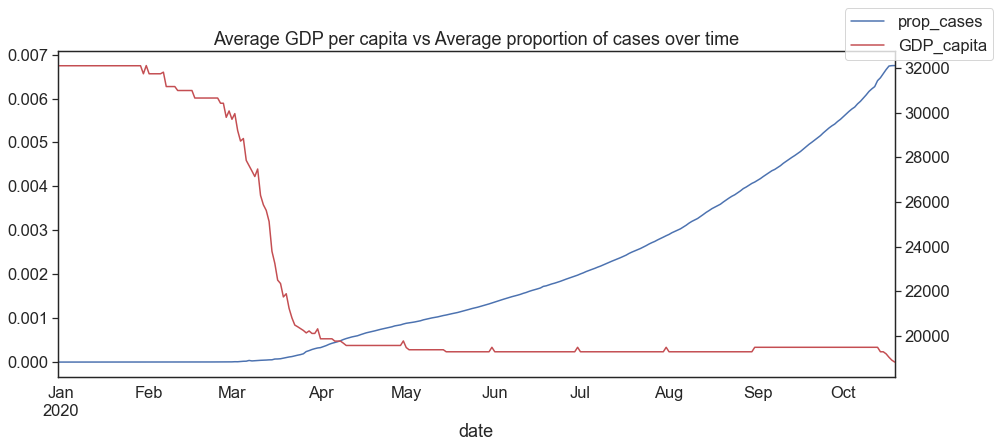

In [28]:
ax = by_time.plot(x="date", y="prop_cases", legend=False)
ax2 = ax.twinx()
by_time.plot(x="date", y="GDP_capita", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_title("Average GDP per capita vs Average proportion of cases over time")
plt.show()

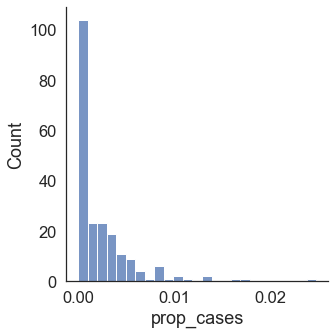

In [26]:
ax = sns.displot(by_country['prop_cases'])

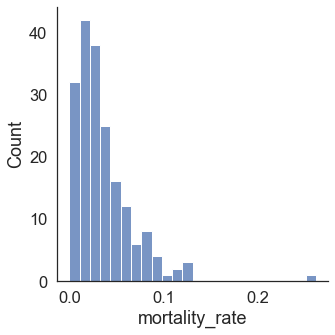

In [27]:
ax = sns.displot(by_country['mortality_rate'])